# Data Scientist - P7 - Laurent Trichet

## Implémentez un modèle de scoring

## 1 Data Exploration - Missing values

### Import required libraries - Constants

In [2]:
# Import default libraries
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import Garbage Collector (empty dataFrame memory)
import gc

# Remove some warnings
import warnings
warnings.filterwarnings('ignore')

# Pandas parameters
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", 120)

# Matplotlib and sns visual parameters
sns.set_style("whitegrid")
sns.set_context("paper")
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11

# Constants
DIRSOURCE = '../Sources/'
DIRRESULT = './credithome_data_analysis/'
FILELIST = ['application_test.csv', 'application_train.csv', 
            'bureau.csv', 'bureau_balance.csv',
            'credit_card_balance.csv', 'installments_payments.csv',
            'POS_CASH_balance.csv', 'previous_application.csv',
            ]
FILEDESCRIPTION = DIRRESULT+'P7_01_Exploratory_Data_Analysis_descriptions.csv'
FILECATEGORIAL = DIRRESULT+'P7_01_Exploratory_Data_Analysis_categorials.txt'
FILEDESCRIBE = DIRRESULT+'P7_01_Exploratory_Data_Analysis_describe.txt'
MAXVALCATEGORIAL = 5  # max nb of values of categorial for which we list the values


### 1.1 Read and complete columns description of all files

> from HomeCredit_columns_description.csv creates new CSV P7_01_Exploratory_Data_Analysis_description.csv with additional information per column:  

<li>type of column<br>
<li>number of "no nan" and "nan" values, plus fill rate<br>
<li>number of unique values<br>
<li>when unique values <= 5 (MAXVALCATEGORIAL): list of values and counts of values<br>
<br>

> check values in Excel (C.f P7_01_Exploratory_Data_Analysis_description.xlsx)

In [3]:
def read_HC_description():
    return pd.read_csv(DIRSOURCE+'HomeCredit_columns_description.csv', encoding='Latin-1')

def get_col_HC_description(dfref, filename='application_train.csv', colname='SK_ID_CURR'):
    if filename == 'application_train.csv':
        filename = 'application_{train|test}.csv'
    if filename == 'application_test.csv':
        filename = 'application_{train|test}.csv'
    i = 0
    while i < dfref.shape[0]:
        if dfref.iloc[i,:]['Table'] == filename and\
           dfref.iloc[i,:]['Row'] == colname:
           return str(dfref.iloc[i,:]['Description']).replace('\t', '')
           break
        i = i + 1
    return ''

In [4]:
df_description = read_HC_description()
outf = open(FILEDESCRIPTION, 'w' )
outf.write('i file\tfile name\tn rows\tn cols\ti col\tcol name\ttype\t')
outf.write('no nan\tnan\tfill rate\tdescription\tunique val\tvalues\tcounts\n' )
df_list = []
ifile = 1
for file_n in FILELIST:
    df = pd.read_csv(DIRSOURCE+file_n, encoding='Latin-1')
    str1 = f'{ifile}\t{file_n}\t{df.shape[0]}\t{df.shape[1]}\t'
    print(f'{ifile}\t{file_n}\t{df.shape[0]:,}\t{df.shape[1]}')
    icol = 1
    col_names = df.columns.values.tolist()
    for col_n in col_names:
        str2 = f'{icol}\t{col_n}\t{df[col_n].dtypes}\t'
        n_nan = df[col_n].isna().sum()
        no_nan = df.shape[0] - n_nan
        fill_rate = ((1000000 * (no_nan / df.shape[0])) // 100) / 100
        str3 = f'{no_nan}\t{n_nan}\t{fill_rate}\t'
        str4 = f'{get_col_HC_description(df_description, file_n, col_n)}\t'
        unique_val = len(df[col_n].unique())
        str5, str6, str7 = f'{unique_val}\t', '\t', '\n'
        if unique_val <= MAXVALCATEGORIAL:
            str6 = f'{df[col_n].value_counts().index.to_list()}\t'
            str7 = f'{df[col_n].value_counts().to_list()}\n'
        outf.write(str1+str2+str3+str4+str5+str6+str7)
        icol = icol + 1
    ifile = ifile + 1
    del df
    gc.collect
outf.close()
del df_description
gc.collect
df_description = pd.read_csv(FILEDESCRIPTION, sep='\t', encoding='Latin-1')
print(f'{FILEDESCRIPTION} ready with {df_description.shape[0]} lines')

1	application_test.csv	48,744	121
2	application_train.csv	307,511	122
3	bureau.csv	1,716,428	17
4	bureau_balance.csv	27,299,925	3
5	credit_card_balance.csv	3,840,312	23
6	installments_payments.csv	13,605,401	8
7	POS_CASH_balance.csv	10,001,358	8
8	previous_application.csv	1,670,214	37
./credithome_data_analysis/P7_01_Exploratory_Data_Analysis_descriptions.csv ready with 339 lines


#### Display fill rates

In [5]:
def bar_plot_fill_rate(df_description, file_name = 'application_train.csv'):
    f, ax = plt.subplots(figsize=(14,df_description[df_description['file name']==file_name].shape[0]//3))
    sns.barplot(x='fill rate',
                y='col name',
                data=df_description[df_description['file name']==file_name],
                )
    ax.set_title(file_name)

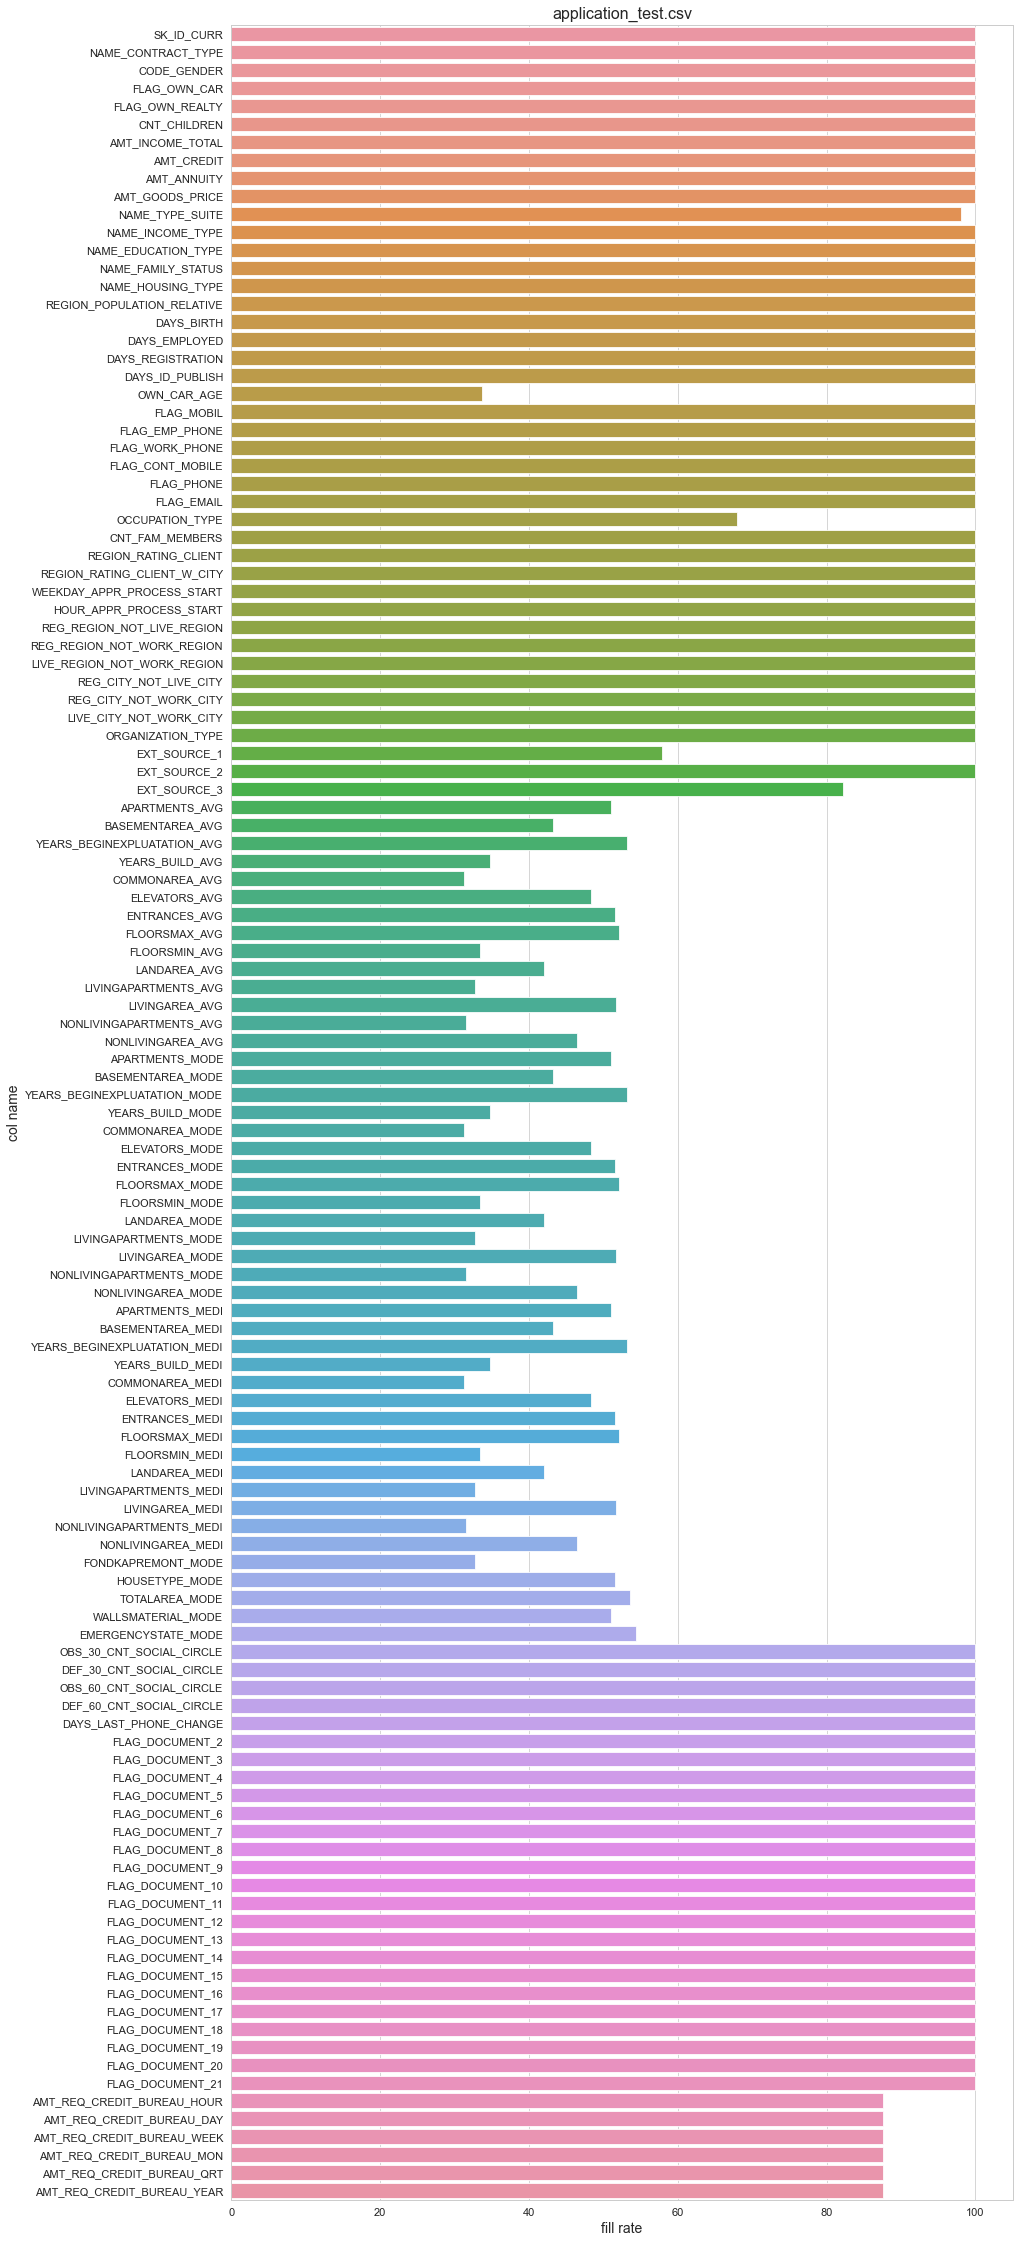

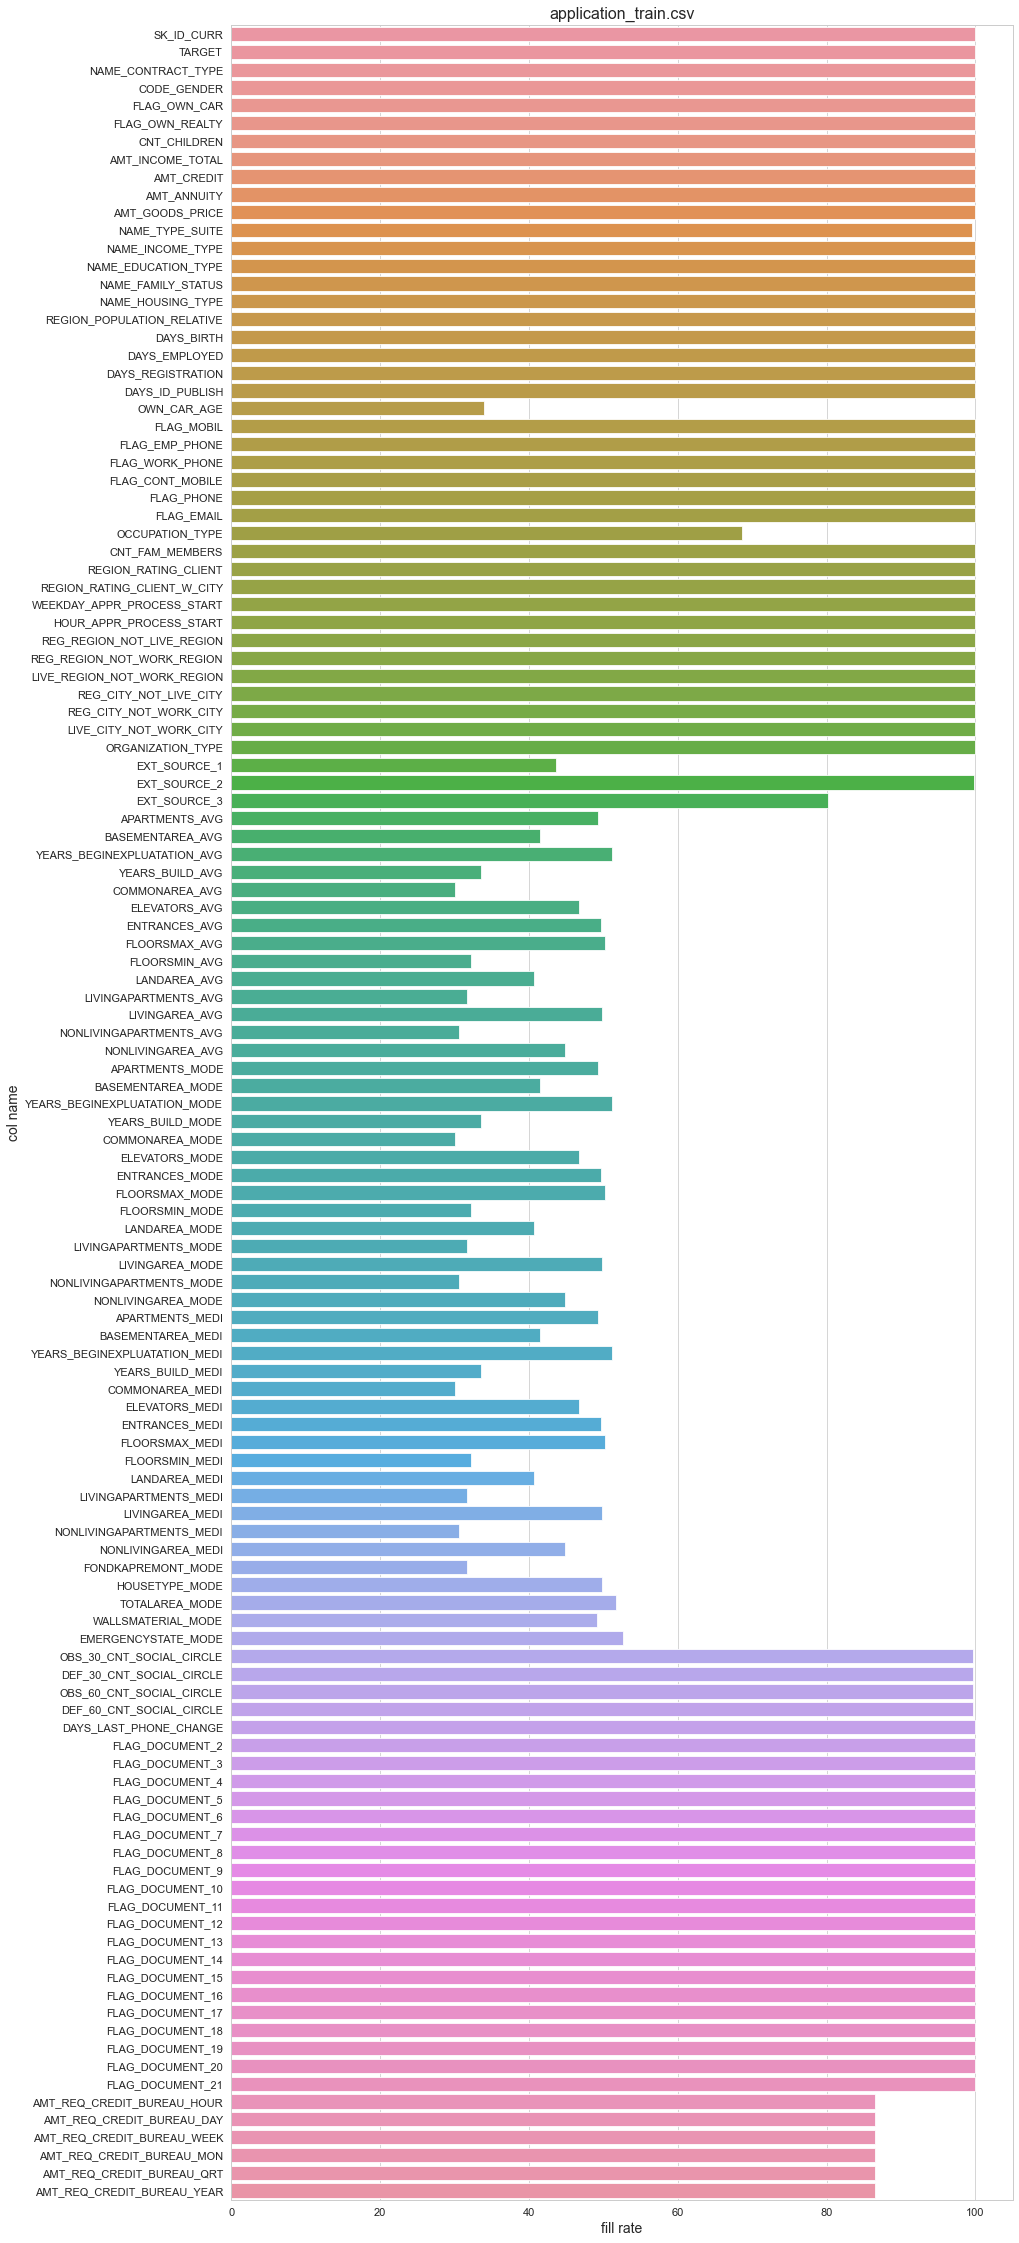

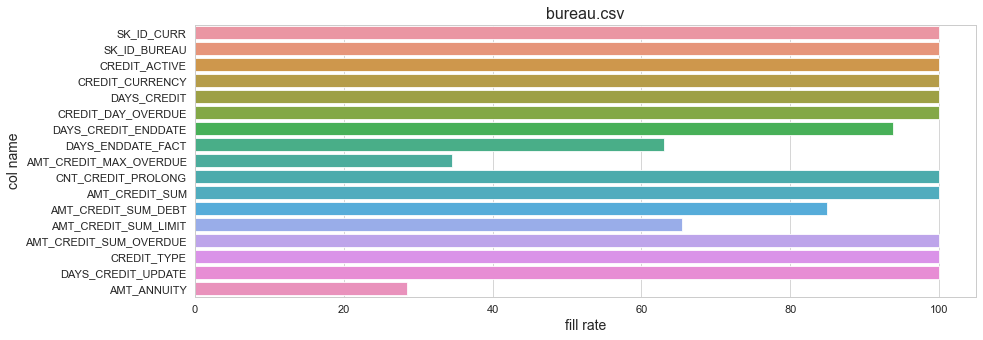

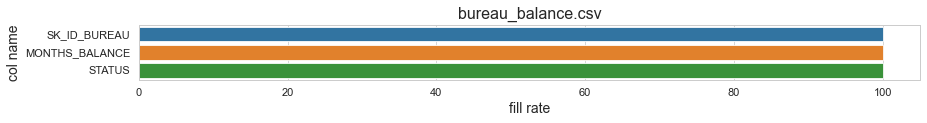

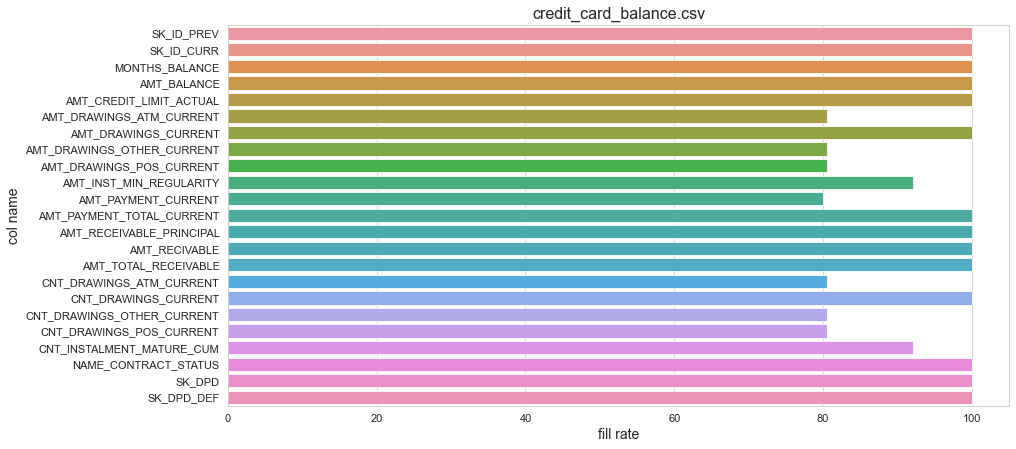

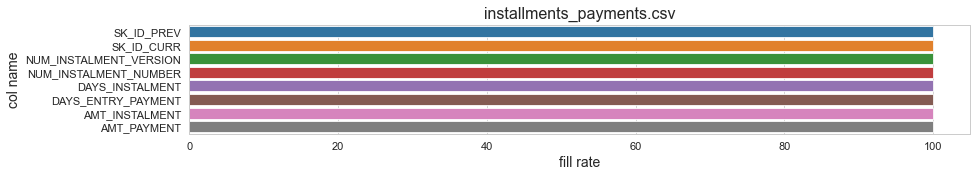

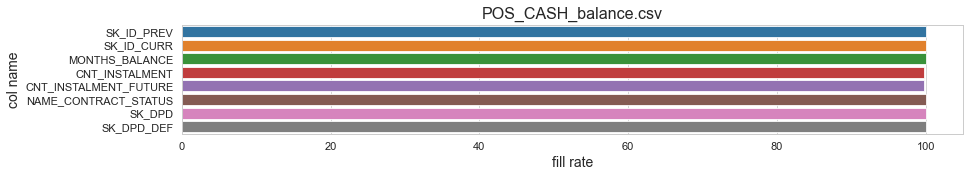

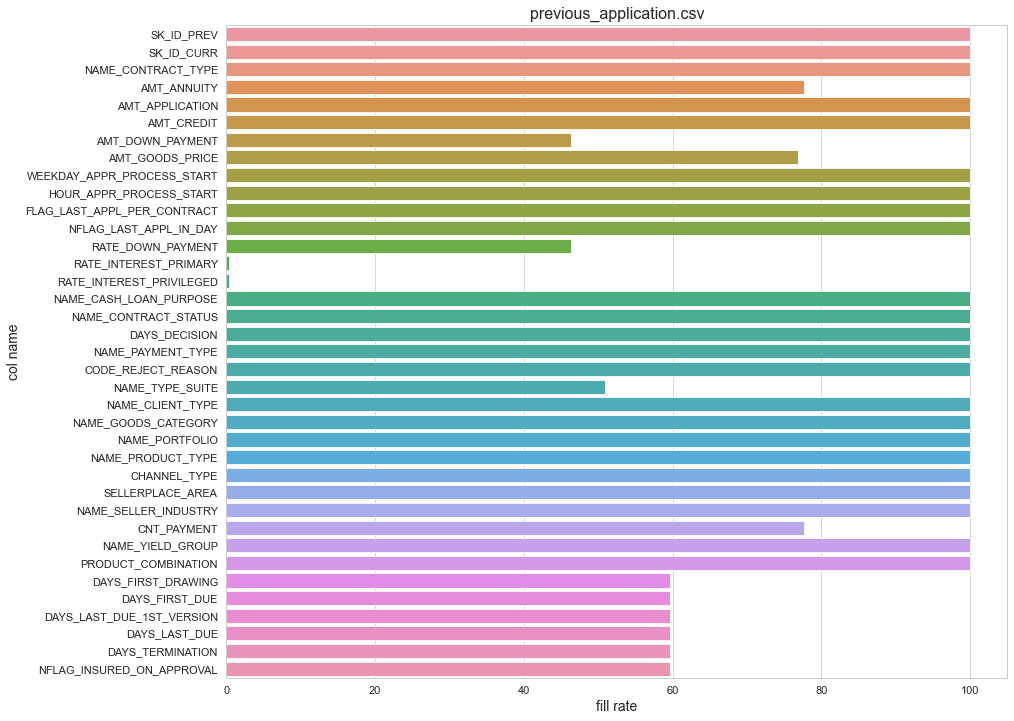

In [6]:
for flname in df_description['file name'].unique():
    bar_plot_fill_rate(df_description, flname)

### 1.2 Check values of categorial variables with counts <= 5 values (MAXVALCATEGORIAL)

> Store in file P7_01_Exploratory_Data_Analysis_categorielles.csv, check with Excel

In [7]:
df_description[df_description['unique val']<=MAXVALCATEGORIAL]\
    [['file name', 'col name', 'fill rate', 'unique val', 'values', 'counts']]\
    .sort_values('col name')\
    .to_csv(FILECATEGORIAL, index=None, sep='\t')
print(f'{FILECATEGORIAL} sorted by col names ready')

./credithome_data_analysis/P7_01_Exploratory_Data_Analysis_categorials.txt sorted by col names ready


### 1.3 Search for outliners with describe function

> Store in file P7_01_Exploratory_Data_Analysis_describe.txt, check file directly

In [8]:
outf = open(FILEDESCRIBE, 'w' )
for file_n in df_description['file name'].unique():
    print(file_n)
    df = pd.read_csv(DIRSOURCE+file_n, encoding='Latin-1')
    outf.write(f'\n{file_n}\n')
    outf.write(df.describe().to_string(line_width=160))
    outf.write(f'\n')
    del df
    gc.collect
outf.close()
print(f'{FILEDESCRIBE} ready')

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
./credithome_data_analysis/P7_01_Exploratory_Data_Analysis_describe.txt ready


### 1.4 Data Cleaning directions

 ------------

 
 Application_train/test:<br>
>	REGION_RATING_CLIENT_W_CITY : (test) remove 1 ligne with val = -1<br>
>	CODE_GENDER : (train) remove 4 lines avec val = ‘XNA’<br>
>	FLAG_MOBILE : 1 value in test et no value in train with 0, remove test corresponding line and column in both files<br>
>	Ext_source_1 ou 3 : missing values for each of them: test fill nan technicis<br>
>	Informations about building : missing about 60% for all them, <b>test fill nan technics</b><br>
>	Enquiries to credit bureau : missing 12% des valeurs<b>test fill nan technics</b><br>
>	FLAG_DOCUMENT_12 2 occurrences only with 1 (in test), remove column<br>
>	DAYS_EMPLOYED : nb days > 365000 (> 1000 years), remove line with these values<br>
>	DAYS_BIRTH : replace days with years (col//365)<br>

Bureau:<br>
>	Days_credit_enddate : missing values for any status CREDIT_ACTIVE (closed, active, sold, bad debt). <b>test fill nan technics</b><br>
>	days_enddate_fact : no values if CREDIT_ACTIVE different from « Closed », that is ok<br>
>	amt_credit_max_overdue : >60% missing values, <b>test fill nan technics</b>, nan = 0?<br>

Credit_card_balance:<br>
>	AMT* and CMT* : missing values, <b>test fill nan technics</b>, nan = 0?<br>
>   unbalanced distributions: <b>test log conversion</b><br>

installements_payment:<br>
>	DAYS_ENTRY_PAYMENT, AMT_PAYMENT : 2905 missing values (0,03%), <b>test fill nan technics</b><br>
>   unbalanced distributions: <b>test log conversion</b><br>

previous_application:<br>
>	down_payment (on previous application) : only 50% filled,  <b>test fill nan technics</b>, nan = 0?<br>
>	goods price : missing >20%, non applicable<br>
>	rate_interest_* : few values, keep columns ?<br>
>	name_type_suite : only 50% filled : nan = « Unaccompanied »<br>
>	cnt_payment : nan = 0 (when 0 or nan, NAME_YIELD_GROUP is XNA)<br>



### 1.5 Log conversion for power law type distribution

> Display distributions of numerical variables.  
> When we observe a distribution in the form of J lying (very high frequence of first values, very low frequence of high values), called  a power law distribution, we replace the values with their logs in order to reduce the range of values and retrieve distributions closer to standard distribution more adapted to many algorithm (gaussian distributions).

#### Credit_card_balance

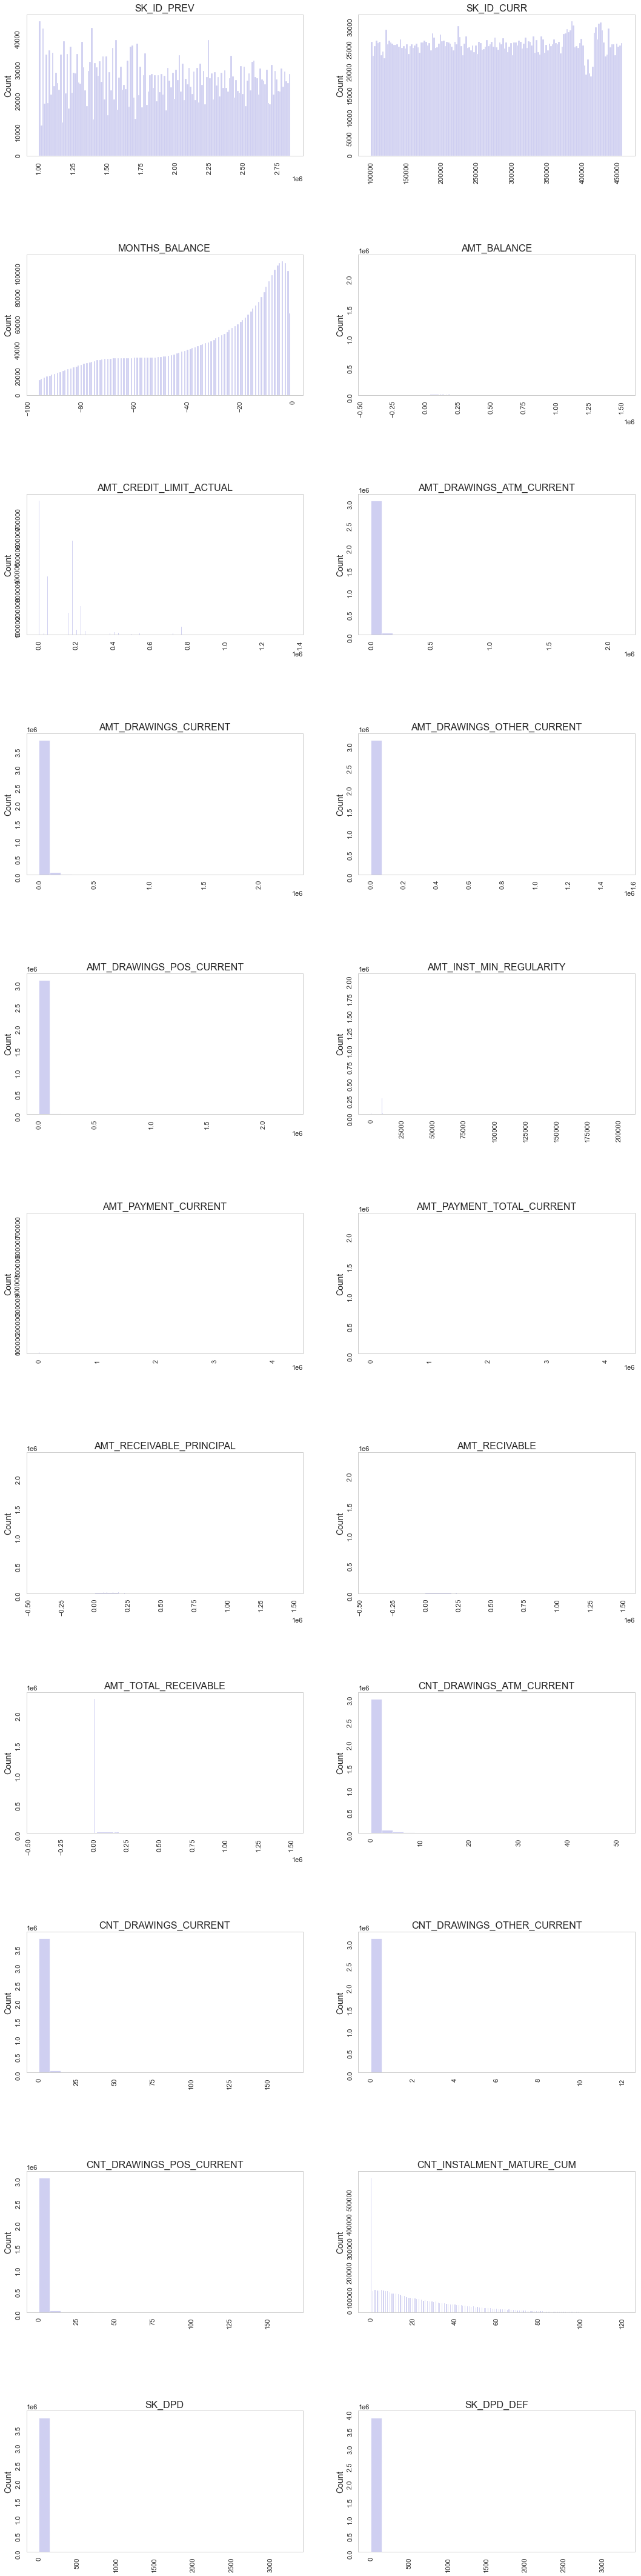

In [9]:
df = pd.read_csv(DIRSOURCE+'credit_card_balance.csv', encoding='Latin-1')

ncols = 2
nrows = int(len(df.columns)/ncols) + (len(df.columns) % ncols) - 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=False, sharey=False,
                         figsize=(18,7*nrows))
fig.subplots_adjust(hspace=0.7)
i = 0
for col_n in df.columns:
    if df[col_n].dtypes != 'object':
        lin = int(i / ncols)
        col = (i % ncols)
        sns.histplot(data=df, x=col_n, kde=False,
                     ax=axes[lin,col], color='#8888dd', alpha=0.4)
        axes[lin, col].set_title(col_n)
        axes[lin, col].set_xlabel('')
        axes[lin, col].tick_params(labelrotation=90)
        axes[lin, col].grid()
        i = i + 1
plt.show()

In [10]:
logcol = ['AMT_BALANCE',
          'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
          'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
          'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
          'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
          'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
          'AMT_TOTAL_RECEIVABLE',
          ]
pd.options.mode.use_inf_as_na = True
for i, col_n in enumerate(logcol):
    df[col_n]=np.log(df[df[col_n]>0][col_n])
    df[col_n].fillna(0, inplace=True)


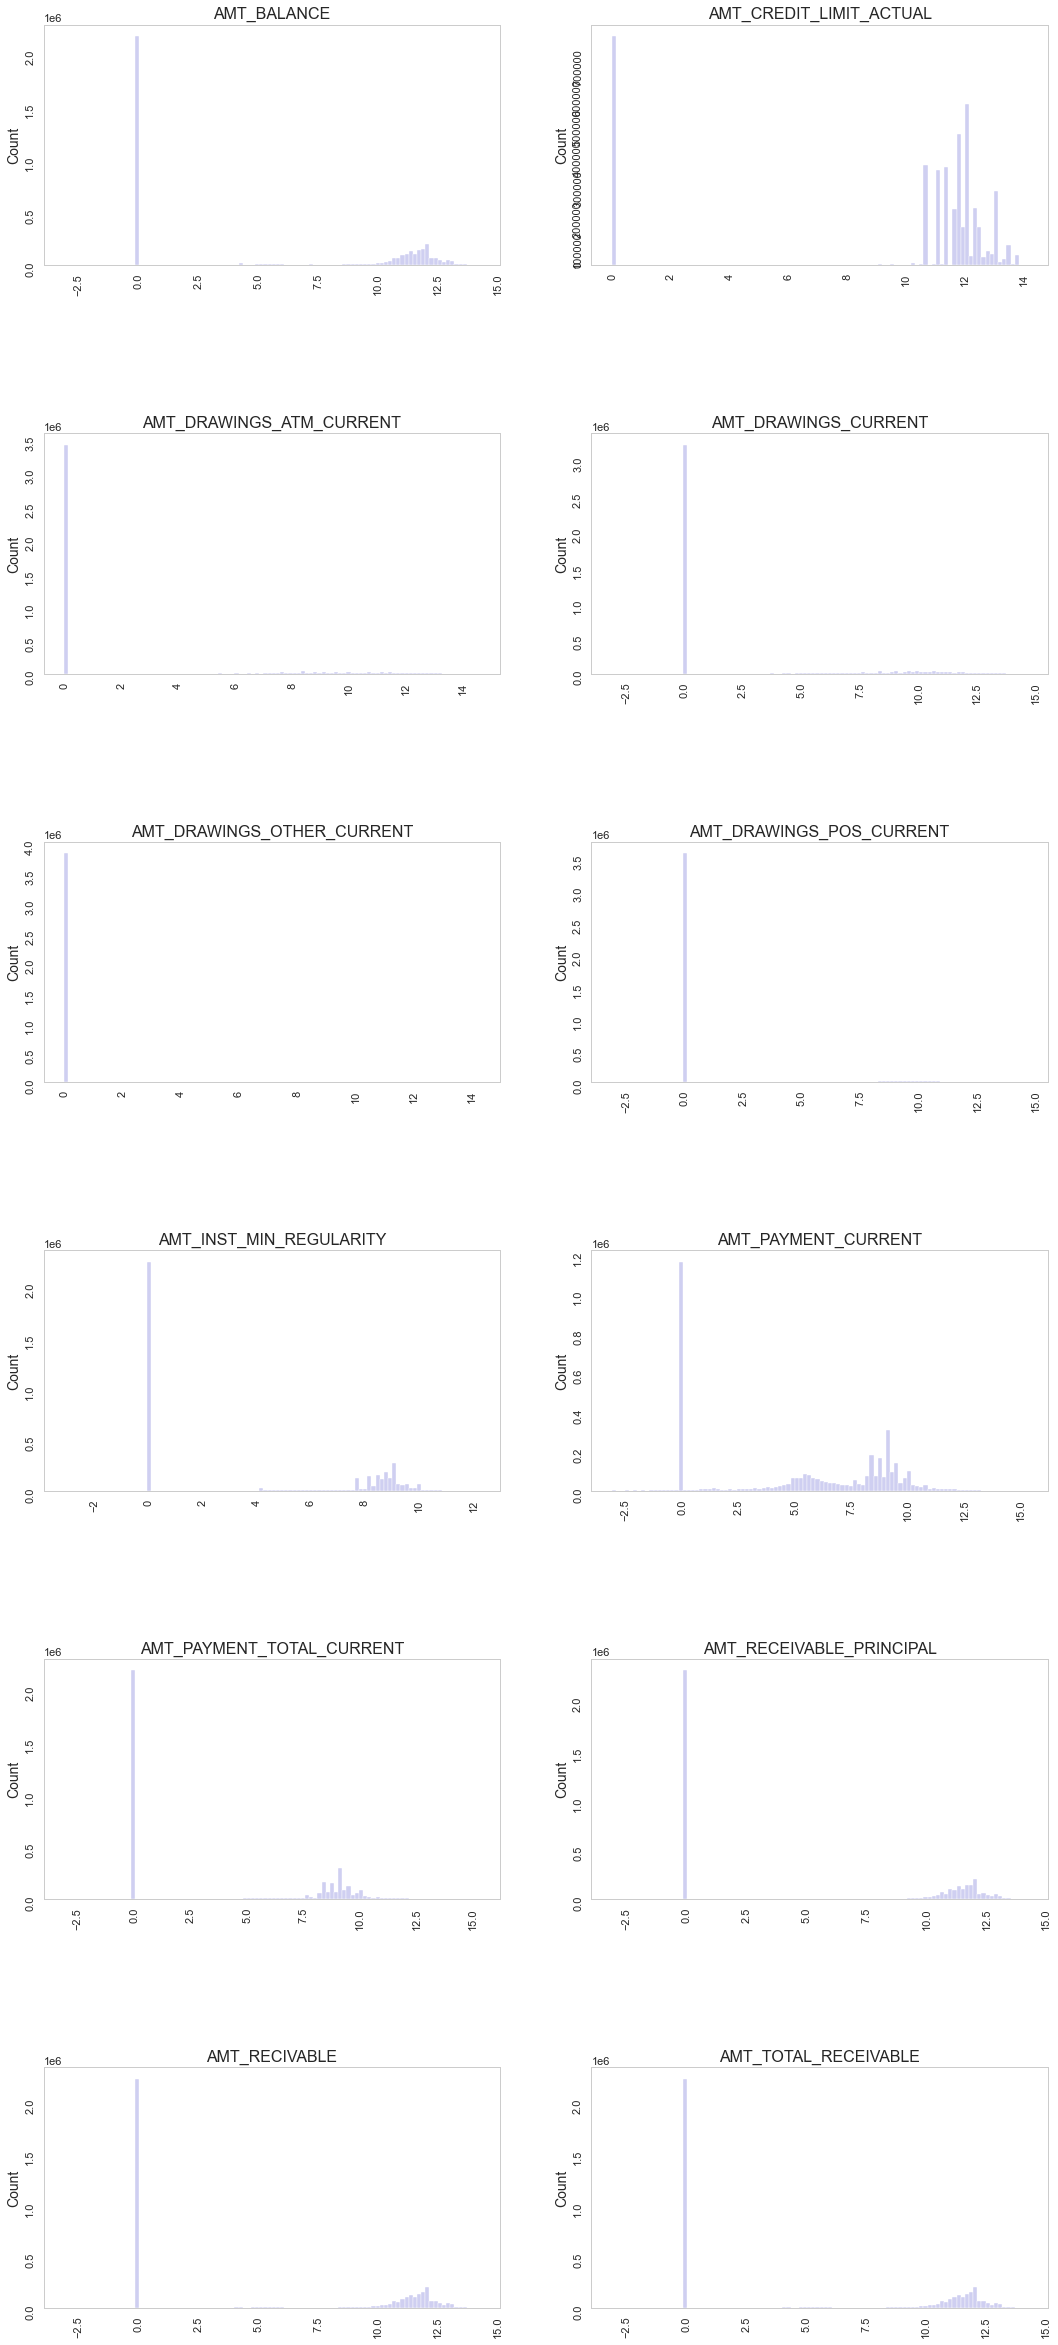

In [11]:
ncols = 2
nrows = len(logcol)//2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=False, sharey=False,
                         figsize=(18,7*nrows))
fig.subplots_adjust(hspace=0.7)
i = 0
for col_n in logcol:
    lin = int(i / ncols)
    col = (i % ncols)
    sns.histplot(data=df, x=col_n, kde=False, bins=100, 
                    ax=axes[lin,col], color='#8888dd', alpha=0.4)
    axes[lin, col].set_title(col_n)
    axes[lin, col].set_xlabel('')
    axes[lin, col].tick_params(labelrotation=90)
    axes[lin, col].grid()
    i = i + 1
plt.show()

In [12]:
df.to_csv(DIRSOURCE+'credit_card_balance_log.csv', index=None, sep='\t')
del df
gc.collect

<function gc.collect(generation=2)>

#### Installments_payments

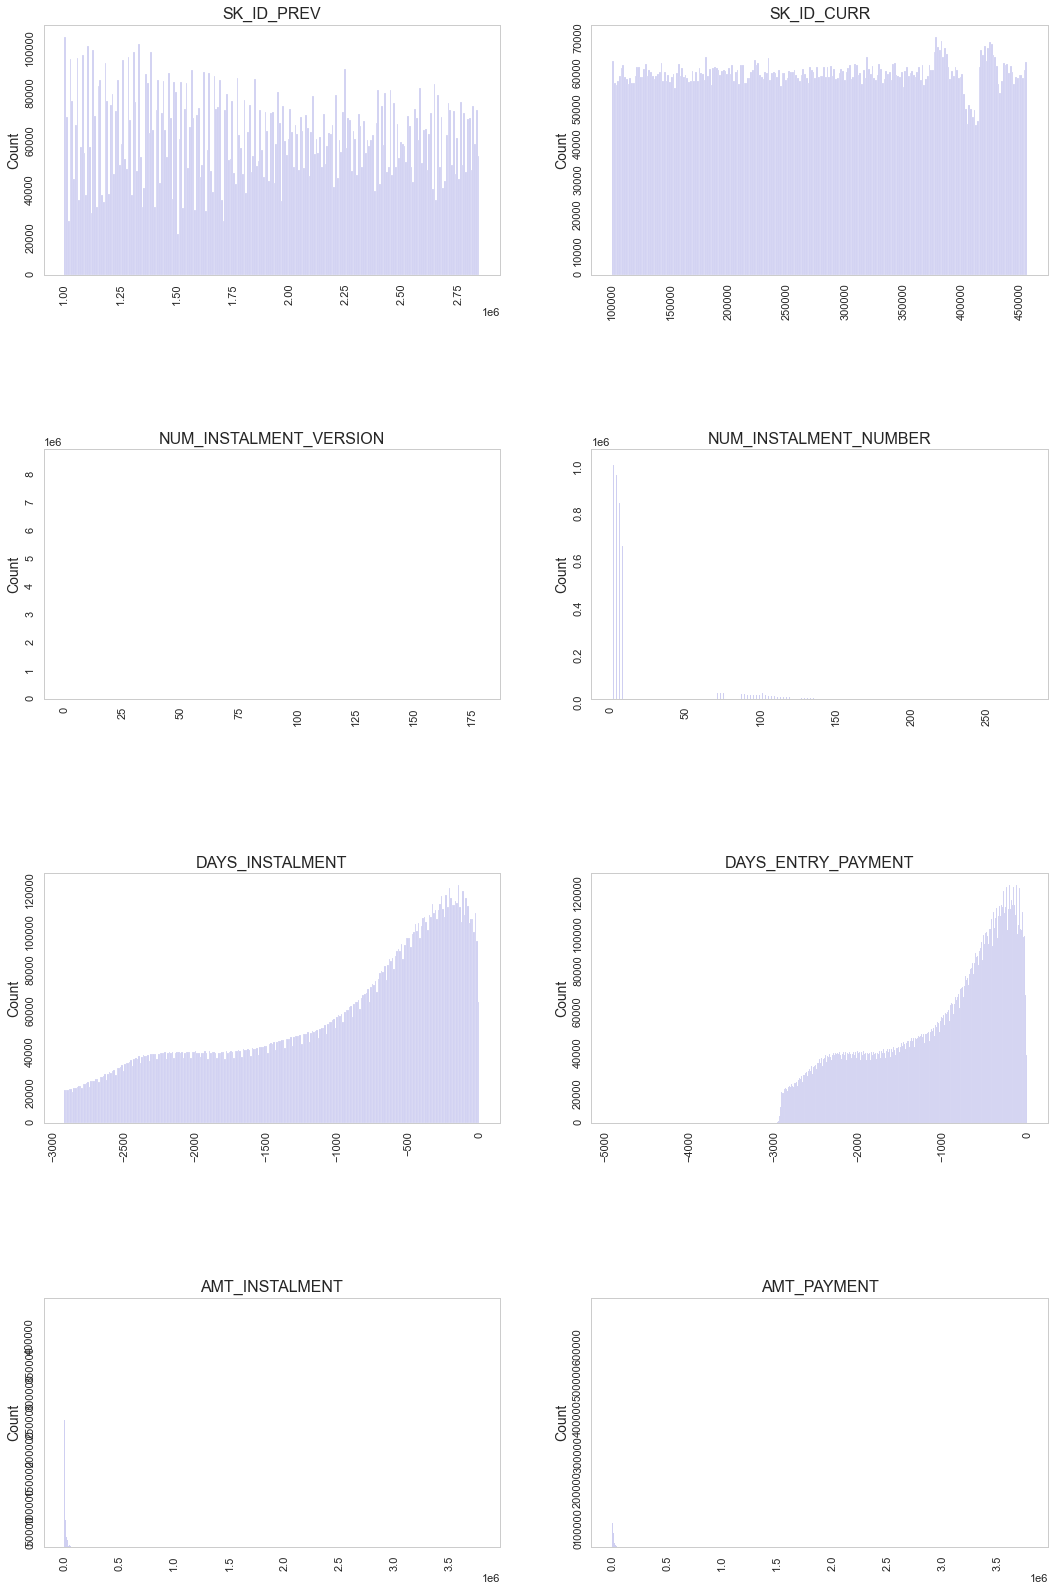

In [19]:
df = pd.read_csv(DIRSOURCE+'installments_payments.csv', encoding='Latin-1')

ncols = 2
nrows = int(len(df.columns)/ncols) + (len(df.columns) % ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=False, sharey=False,
                         figsize=(18,7*nrows))
fig.subplots_adjust(hspace=0.7)
i = 0
for col_n in df.columns:
    if df[col_n].dtypes != 'object':
        lin = int(i / ncols)
        col = (i % ncols)
        sns.histplot(data=df, x=col_n, kde=False,
                     ax=axes[lin,col], color='#8888dd', alpha=0.4)
        axes[lin, col].set_title(col_n)
        axes[lin, col].set_xlabel('')
        axes[lin, col].tick_params(labelrotation=90)
        axes[lin, col].grid()
        i = i + 1
plt.show()

In [20]:
logcol = ['AMT_INSTALMENT', 'AMT_PAYMENT']
pd.options.mode.use_inf_as_na = True
for i, col_n in enumerate(logcol):
    df[col_n]=np.log(df[df[col_n]>0][col_n])
    df[col_n].fillna(0, inplace=True)


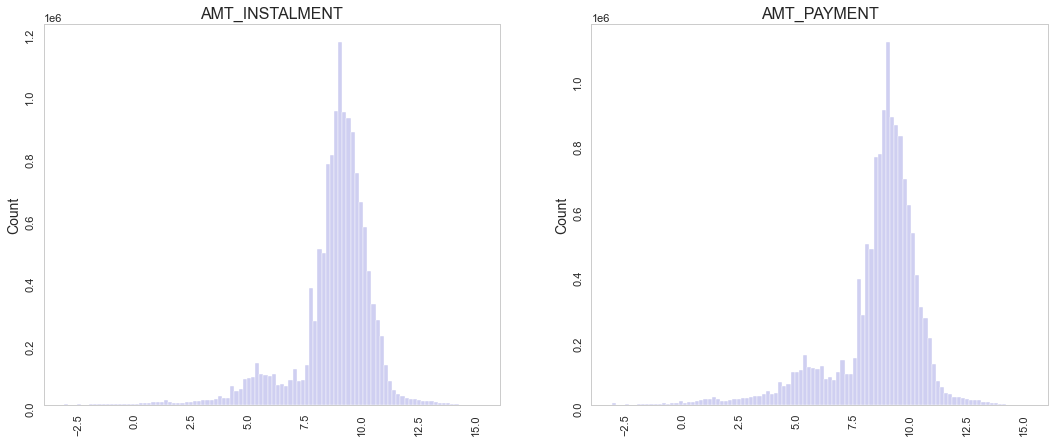

In [21]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=False, sharey=False,
                         figsize=(18,7*nrows))
fig.subplots_adjust(hspace=0.7)
i = 0
for col_n in logcol:
    if df[col_n].dtypes != 'object':
        col = (i % ncols)
        sns.histplot(data=df, x=col_n, kde=False, bins=100,
                     ax=axes[col], color='#8888dd', alpha=0.4)
        axes[col].set_title(col_n)
        axes[col].set_xlabel('')
        axes[col].tick_params(labelrotation=90)
        axes[col].grid()
        i = i + 1
plt.show()

In [22]:
df.to_csv(DIRSOURCE+'installments_payments_log.csv', index=None, sep='\t')
del df
gc.collect

<function gc.collect(generation=2)>

#### Previous_application

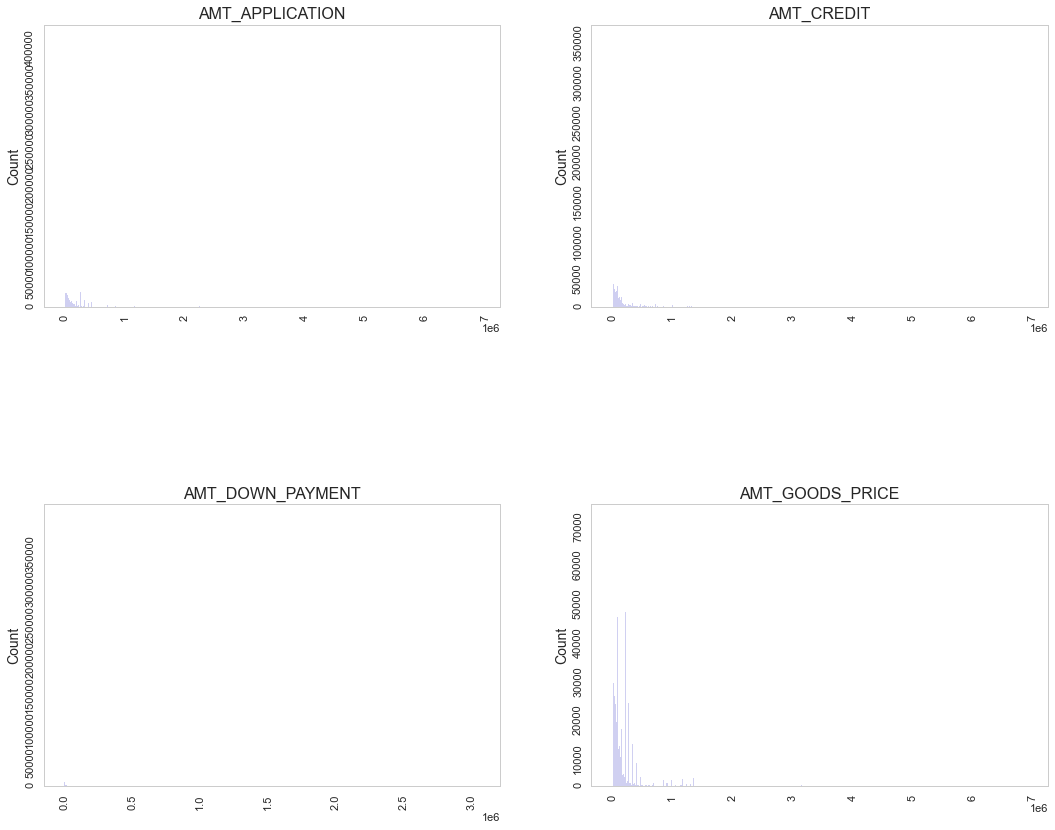

In [23]:
df = pd.read_csv(DIRSOURCE+'previous_application.csv', encoding='Latin-1')

logcol = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']

ncols = 2
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=False, sharey=False, figsize=(18,7*nrows))
fig.subplots_adjust(hspace=0.7)
i = 0
for col_n in logcol:
    lin = int(i / ncols)
    col = (i % ncols)
    sns.histplot(data=df, x=col_n, kde=False,
                    ax=axes[lin,col], color='#8888dd', alpha=0.4)
    axes[lin, col].set_title(col_n)
    axes[lin, col].set_xlabel('')
    axes[lin, col].tick_params(labelrotation=90)
    axes[lin, col].grid()
    i = i + 1
plt.show()

In [24]:
pd.options.mode.use_inf_as_na = True
for col_n in logcol:
    df[col_n]=np.log(df[df[col_n]>0][col_n])
    df[col_n].fillna(0, inplace=True)


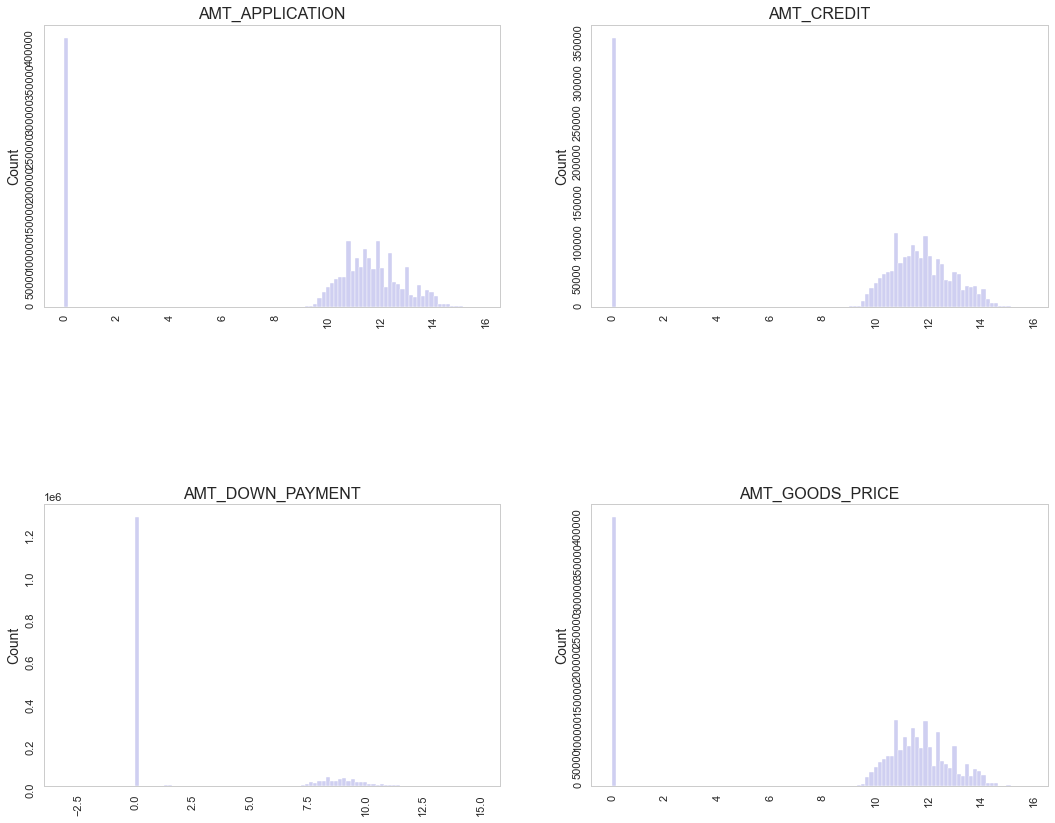

In [25]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         sharex=False, sharey=False, figsize=(18,7*nrows))
fig.subplots_adjust(hspace=0.7)
i = 0
for col_n in logcol:
    lin = int(i / ncols)
    col = (i % ncols)
    sns.histplot(data=df, x=col_n, kde=False, bins=100,
                    ax=axes[lin,col], color='#8888dd', alpha=0.4)
    axes[lin, col].set_title(col_n)
    axes[lin, col].set_xlabel('')
    axes[lin, col].tick_params(labelrotation=90)
    axes[lin, col].grid()
    i = i + 1
plt.show()

In [26]:
df.to_csv(DIRSOURCE+'previous_application_log.csv', index=None, sep='\t')
del df
gc.collect

<function gc.collect(generation=2)>